# Data Analysis Project: Bike Sharing Dataset
- **Name:** M. Wahyu Abdila Lubis
- **Email:** mwahyuabdila@gmail.com
- **Dicoding ID:** mwahyuabdilalubis


## Defining Business Questions

- How did the trend in bicycle rentals change from 2011 to 2012? Was there a significant increase or decrease?
- How does the distribution of bicycle rentals differ in spring, summer, autumn, and winter?
- Is the number of bike rentals higher on workingdays or holidays?
- What is the impact or correlation of temp, atemp, hum, and windspeed on the number of bicycle rentals?
- Clustering Bike Renters Based on Peak and Off-Peak Hours?

## Importing All Packages/Libraries Used


In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


## Data Wrangling

### Gathering Data

In this process, we gather all the data needed for the analysis. In the Bike Sharing Dataset, there are two data files: **day.csv** and **hour.csv**.

#### Dataset characteristics
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [244]:
day_df = pd.read_csv("https://raw.githubusercontent.com/wahyuabdila23/Dashboard-bike-sharing-dataset/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [245]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/wahyuabdila23/Dashboard-bike-sharing-dataset/main/data/hour.csv")
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Based on the code above, **read_csv()** is used to read the `day.csv` and `hour.csv` data files, while **head()** is used to display the top 5 rows of data in each file.
- Based on the data characteristics, for the next steps, we will use **hour.csv or hour.df** because this data already includes the information in `day.csv` or `day.df`.

### Assessing Data

In this process, we will evaluate the quality of our data by identifying various issues present in the data.

#### Check for Data Types

In [246]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Based on the results of the code above, we can see a data type mismatch in the **dteday** feature, which is categorized as an object type. This is a mistake because the **dteday** feature should be of **datetime** data type.

#### Check for Missing Values

In [247]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Based on the code above, **isna().sum()** is used to see the number of missing values in the `hour.csv` or `hour.df` data.
- The results show that **there are no missing values** in the data used.

#### Check for Duplicate Data

In [248]:
hour_df.duplicated(print("Number of duplicate data:")).sum()

Number of duplicate data:


0

- Based on the code above, **duplicated().sum()** is used to see the number of duplicate data in the dataframe.
- The results show that **there are no duplicate data** in the dataset.

#### Check for Statistical Parameters

In [249]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Based on the code above, we use the **describe()** method to display statistical parameters. We use this to identify any unusual or inaccurate values in the data.
- Based on the results of the statistical parameters, we **did not** find any **anomalies** or irregularities.

### Cleaning Data

#### Handling Data Type Errors

In [250]:
hour_columns =["dteday"]
for column in hour_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Based on the code above, we use the **to_datetime** function to change the data type to datetime.



In [251]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Next, we check again with **info()** to see the data types, and now the data type of the **dteday** feature is **correct**.

#### Removing Unnecessary Features

In [252]:
hour_df_cleaned=hour_df.drop(columns=['instant','holiday'], inplace=True)


In [253]:
hour_df

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


The above code uses **drop()** to delete columns/features, where in this case, the **instant and holiday** features are **removed**.

#### Save the cleaned dataset

In [254]:
hour_df.to_csv("bike_sharing_data.csv", index=False)

The above code is intended to save the cleaned file.

## Exploratory Data Analysis (EDA)

We conduct exploratory analysis to answer predefined business questions.

In [255]:
cnt_year= hour_df.groupby ("yr").cnt.sum().sort_values(ascending=False).reset_index()
cnt_year['yr']= cnt_year['yr'].map({0:'2011', 1: '2012'})
cnt_year

,yr,cnt
0,2012,2049576
1,2011,1243103


Note : yr : year (0: 2011, 1:2012)

In [256]:
cnt_season = hour_df.groupby("season")['cnt'].sum().sort_values(ascending=False).reset_index()
cnt_season['season'] = cnt_season['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
cnt_season

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


season (1:springer (Semi), 2:summer (Panas), 3:fall (gugur), 4:winter (salju)

In [257]:
cnt_holiday = hour_df.groupby("workingday")['cnt'].sum().sort_values(ascending=False).reset_index()
cnt_holiday['workingday'] = cnt_holiday['workingday'].map({1: 'Workingday', 0: 'Holiday'})
cnt_holiday

,workingday,cnt
0,Workingday,2292410
1,Holiday,1000269


In [258]:
hourly_df = hour_df.groupby('hr')['cnt'].mean().reset_index()
hourly_df.columns = ['Hour', 'Average Rentals']
hourly_df

,Hour,Average Rentals
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


## Visualization & Explanatory Analysis

In this step, we will answer and visualize the answers to business questions and analyze the findings we obtain.

### Question 1: **How did the trend of bike rentals change from 2011 to 2012? Was there any significant increase or decrease?**

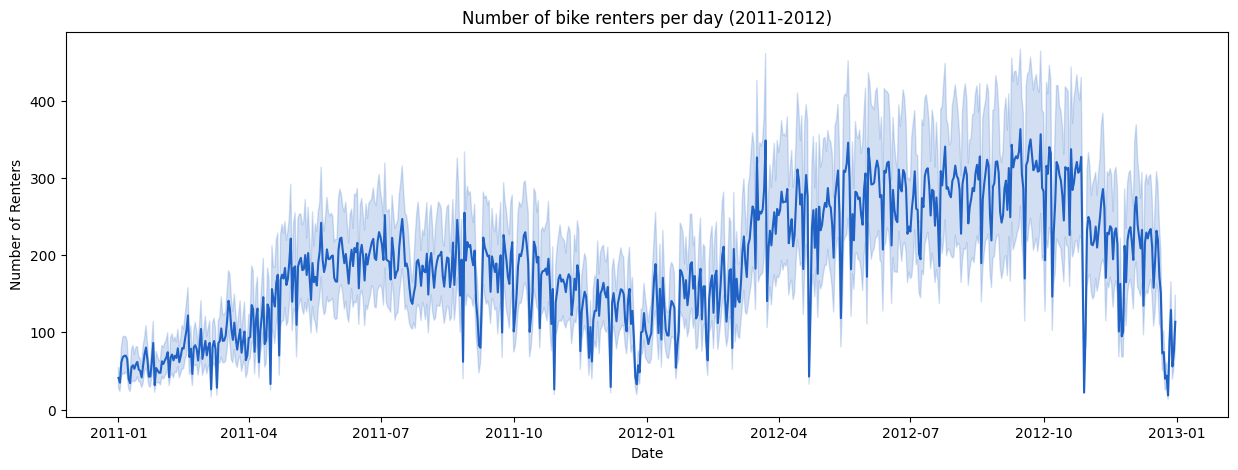

In [259]:
plt.figure(figsize=(15,5))
sns.lineplot(x='dteday', y='cnt', data=hour_df, color='#1F61C4')

plt.xlabel("Date")
plt.ylabel("Number of Renters")
plt.title("Number of bike renters per day (2011-2012)")

plt.show()

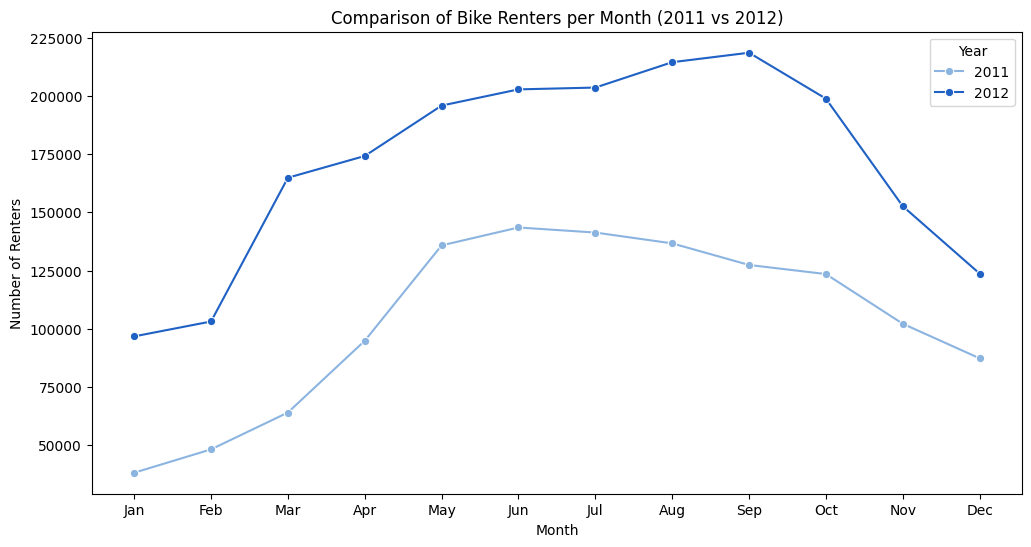

In [260]:
cnt_year_month = hour_df.groupby(['yr', hour_df['dteday'].dt.month])['cnt'].sum().reset_index()
cnt_year_month.columns = ['Year', 'Month', 'Total Count']
cnt_year_month['Year']= cnt_year_month['Year'].map({0:'2011', 1: '2012'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=cnt_year_month, x='Month', y='Total Count', hue='Year', marker='o', palette=['#8CB4E1','#1F61C4'])
plt.title('Comparison of Bike Renters per Month (2011 vs 2012)')
plt.xlabel('Month')
plt.ylabel('Number of Renters')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()


Based on the above graph, we can see there is an increase in bike rentals from 2011 to 2012, although it is not consistently increasing. We can also see that the peak of bike renters occurred in September 2012.

### Question 2: **How does the distribution of bike rentals differ in spring, summer, fall, and winter?**

<ipython-input-261-b5745ae2ae5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


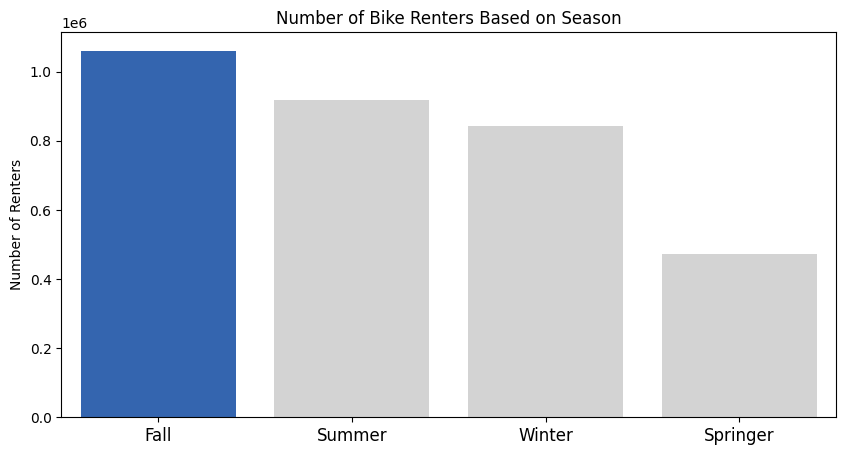

In [261]:
plt.figure(figsize=(10, 5))
colors = ["#1F61C4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="cnt",
    x="season",
    data=cnt_season,
    palette=colors
)
plt.title("Number of Bike Renters Based on Season")
plt.ylabel("Number of Renters")
plt.xlabel("")
plt.tick_params(axis='x', labelsize=12)
plt.show()




We can see that bike rentals in **fall** are the highest with a total of **1,061,129** renters, while the season with the lowest or **fewest** renters is **spring** with a total of **471,348** renters.

### Question 3: **Is the number of bike rentals higher on workingdays or holidays?**

<ipython-input-262-e3e5b4fcdadd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=cnt_holiday, palette=colors)
<ipython-input-262-e3e5b4fcdadd>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x='workingday', y='cnt', data=cnt_holiday, palette=colors)


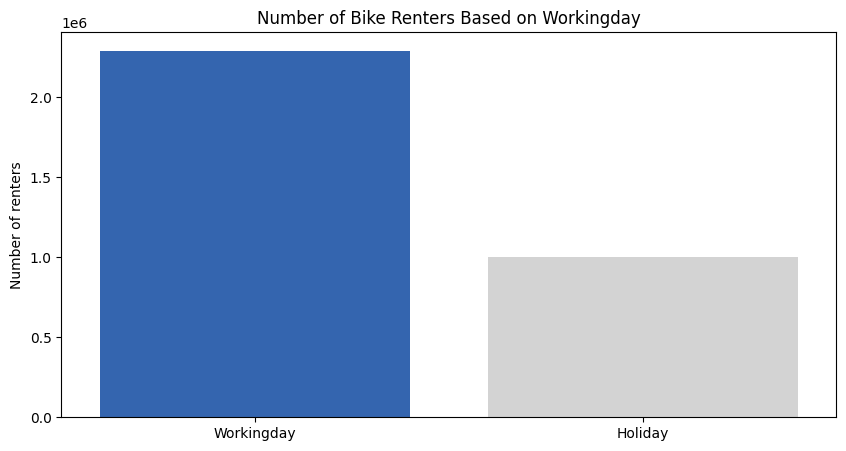

In [262]:
# Plot rentals by season
plt.figure(figsize=(10, 5))
sns.barplot(x='workingday', y='cnt', data=cnt_holiday, palette=colors)
plt.title("Number of Bike Renters Based on Workingday")
plt.xlabel("")
plt.ylabel("Number of renters")
plt.show()

We can see from the graph above that Workingdays have more renters compared to Holidays, with Workingday having a total of 2,292,410 renters and Holiday having 1,000,269 renters. This may be due to bikes being rented for daily activities such as work and others.

### Question 4: **What is the influence of temp, atemp, hum, and windspeed on the number of bike rentals?**


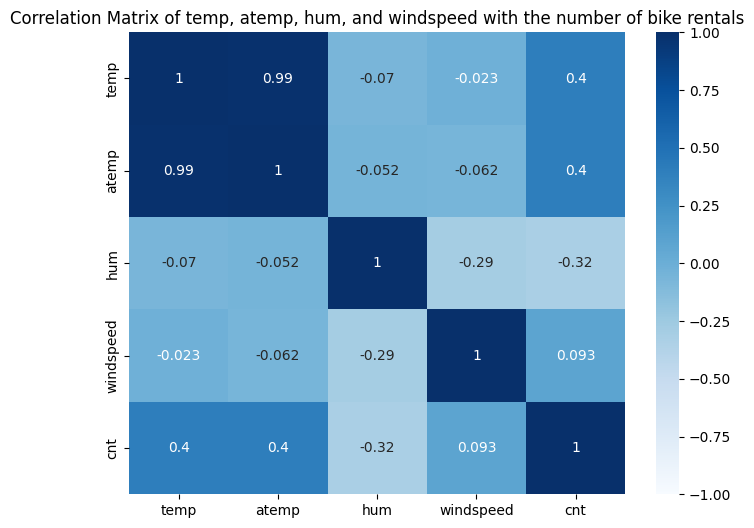

In [263]:
# Calculating the correlation matrix
selected_columns =['temp', 'atemp','hum','windspeed','cnt']
subset_df = hour_df[selected_columns]
correlation_matrix = subset_df.corr()

# Plotting the correlation matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix of temp, atemp, hum, and windspeed with the number of bike rentals')
plt.show()

From the graph above, we can see a strong correlation between the features temp and atemp. There is a **moderate correlation** between **cnt (number of renters)** and **temp (temperature)** and atemp, a weak correlation between the number of renters and windspeed, and no correlation between the number of renters and hum.

### Question 5: **Clustering Bike Renters Based on Peak and Off-Peak Hours?**

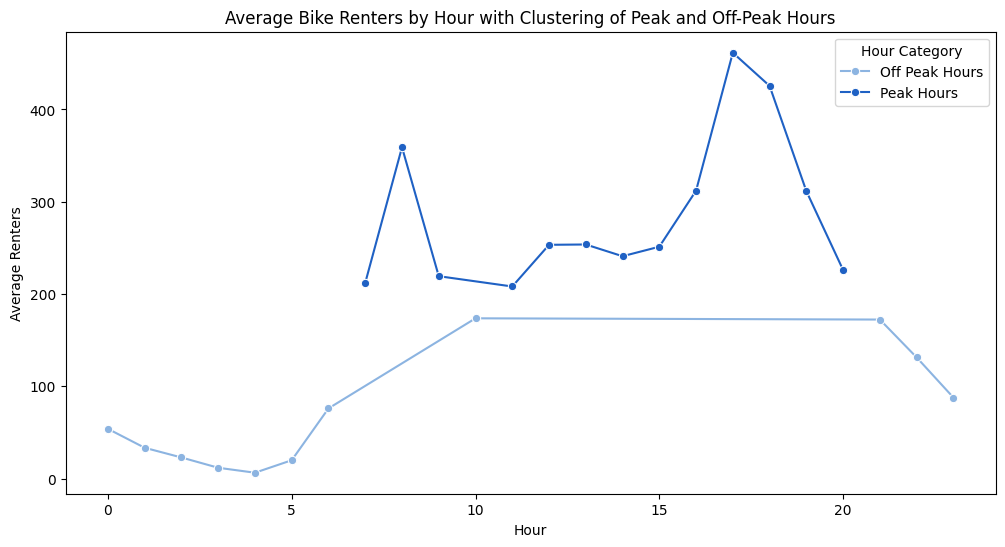

In [264]:
# Clustering hours based on whether they belong to the "busy" or "off-peak" category
threshold = hourly_df['Average Rentals'].mean()

def classify_by_hourly_count(value):
    if value > threshold:
        return 'Peak Hours'
    else:
        return 'Off Peak Hours'

hourly_df['Hour Category'] = hourly_df['Average Rentals'].apply(classify_by_hourly_count)

# Plotting the average count per hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Average Rentals', data=hourly_df, marker='o', hue='Hour Category', palette=['#8CB4E1','#1F61C4'])
plt.title("Average Bike Renters by Hour with Clustering of Peak and Off-Peak Hours")
plt.xlabel("Hour")
plt.ylabel("Average Renters")
plt.legend(title='Hour Category')
plt.show()

# Highlight peak and off-peak hours based on visualization
peak_hours = hourly_df[hourly_df['Average Rentals'] > threshold]
off_peak_hours = hourly_df[hourly_df['Average Rentals'] <= threshold]




In [265]:
peak_hours

,Hour,Average Rentals,Hour Category
7,7,212.064649,Peak Hours
8,8,359.011004,Peak Hours
9,9,219.309491,Peak Hours
11,11,208.143054,Peak Hours
12,12,253.315934,Peak Hours
13,13,253.661180,Peak Hours
14,14,240.949246,Peak Hours
15,15,251.233196,Peak Hours
16,16,311.983562,Peak Hours
17,17,461.452055,Peak Hours


The table above represents the peak hours cluster.

In [266]:
off_peak_hours

,Hour,Average Rentals,Hour Category
0,0,53.898072,Off Peak Hours
1,1,33.375691,Off Peak Hours
2,2,22.869930,Off Peak Hours
3,3,11.727403,Off Peak Hours
4,4,6.352941,Off Peak Hours
5,5,19.889819,Off Peak Hours
6,6,76.044138,Off Peak Hours
10,10,173.668501,Off Peak Hours
21,21,172.314560,Off Peak Hours
22,22,131.335165,Off Peak Hours


The table above represents the off-peak hours cluster.

We can conclude that the 5 PM (17) hour has the highest average bike renters and belongs to the peak hours cluster, while the hour with the lowest average bike renters is at 4 AM, which falls into the off-peak hours cluster.

## Conclusion

### **Increase in Bike Rentals from 2011 to 2012**

This indicates a positive trend in bike rentals over time, suggesting that bike-sharing services became more popular or accessible between 2011 and 2012. Possible reasons for this increase could include growing awareness of environmental concerns, improved bike-sharing infrastructure, or increased interest in alternative modes of transportation.

### **Higher Bike Renters in the Fall Season and Lower in the Spring Season**
 The higher number of bike renters in the Fall season may be attributed to pleasant weather conditions, such as mild temperatures and lower precipitation, which make outdoor activities like biking more enjoyable. Conversely, the lower number of bike renters in the Spring season could be due to factors such as unpredictable weather or competing outdoor activities.

### **Preference for Bike Rentals on Working Days**
Renters are more likely to rent bikes on working days, indicating that bikes are primarily used for commuting or running errands during the workweek. This pattern suggests that bike-sharing services may be particularly beneficial for urban commuters looking for convenient and cost-effective transportation options.

### **There is no significant correlation between temp (temperature), atemp, hum, windspeed, and the number of bike renters.**
The absence of a significant correlation between temperature, apparent temperature, humidity, windspeed, and the number of bike renters suggests that these weather variables may not strongly influence the decision to rent a bike. Other factors such as convenience, infrastructure, or personal preferences may have a greater impact.

### **Bike Renters Tend to be Busy in the Evening and Quiet in the Early Morning**

The observation that bike renters are busiest in the evening and quietest in the early morning aligns with typical commuting patterns. Many people may choose to rent bikes for recreational purposes or leisurely rides in the evenings, while the early morning hours may see fewer rentals as people are less likely to be commuting or engaging in outdoor activities at that time.